In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Auto-cleaned.csv")
df = df.drop("Unnamed: 0", axis=1)
print(df.shape)
df.head(3)

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [3]:
features = df.drop(['mpg', 'name'], axis=1)
features.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [4]:
target = pd.qcut(df.mpg,2,['red','green'])
target.value_counts()

green    196
red      196
Name: mpg, dtype: int64

# (A)

In [5]:
features = (features - features.mean()) / features.std()

In [6]:
features.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.715726
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.715726
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.715726
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.715726
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.715726


PC1    0.658866
PC2    0.134290
PC3    0.106309
PC4    0.068759
PC5    0.018510
PC6    0.008451
PC7    0.004815
dtype: float64


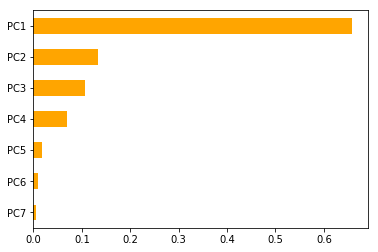

In [7]:
n_comp = features.shape[1]
cols = ['PC'+str(i+1) for i in range(n_comp)]
pca = PCA(n_components=n_comp)
pca.fit(features)
PVE = pd.Series(pca.explained_variance_ratio_, index=cols)
print(PVE)
PVE.sort_values().plot.barh(color='orange')

### (i)
About 65.9% of the total variation is explained by the first principle component
### (ii)
About 97% of the total variation is explained by the first four principle components

# (B)

In [8]:
df_loadings = pd.DataFrame(pca.components_,columns= features.columns, index=cols)
print(df_loadings.shape)
df_loadings.round(2)

(7, 7)


,cylinders,displacement,horsepower,weight,acceleration,year,origin
PC1,0.44,0.45,0.44,0.43,-0.30,-0.21,-0.30
PC2,-0.12,-0.11,0.14,-0.20,-0.48,-0.64,0.52
PC3,-0.03,-0.02,-0.18,0.01,0.56,-0.73,-0.34
PC4,0.24,0.16,0.12,0.34,0.53,0.03,0.71
PC5,0.70,0.18,-0.58,-0.35,-0.12,-0.02,0.08
PC6,0.19,0.06,0.61,-0.71,0.27,0.06,-0.06
PC7,-0.45,0.85,-0.17,-0.19,0.02,0.01,0.07


### (i)
Displacement, Cylinders, and Horsepower
### (ii)
Year, Origin, and Acceleration

# (C)

In [9]:
df_scores = pd.DataFrame(pca.transform(features),columns=cols)
print(df_scores.shape)
df_scores.round(2)

(392, 7)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.64,0.97,0.54,-0.42,0.76,-0.08,-0.08
1,3.37,1.09,0.27,-0.26,0.25,0.29,0.07
2,2.99,1.22,0.25,-0.55,0.55,0.20,-0.07
3,2.82,1.06,0.45,-0.38,0.49,0.29,-0.18
4,2.87,1.28,0.19,-0.70,0.69,-0.03,-0.16
5,4.58,1.24,-0.19,-0.06,-0.31,0.18,0.41
6,5.06,1.47,-0.50,-0.14,-0.56,0.44,0.50
7,4.97,1.56,-0.58,-0.29,-0.47,0.34,0.42
8,5.05,1.30,-0.32,0.10,-0.71,0.56,0.48
9,4.24,1.63,-0.46,-0.63,0.01,0.29,0.23


#### 392 rows × 7 columns

# (D)

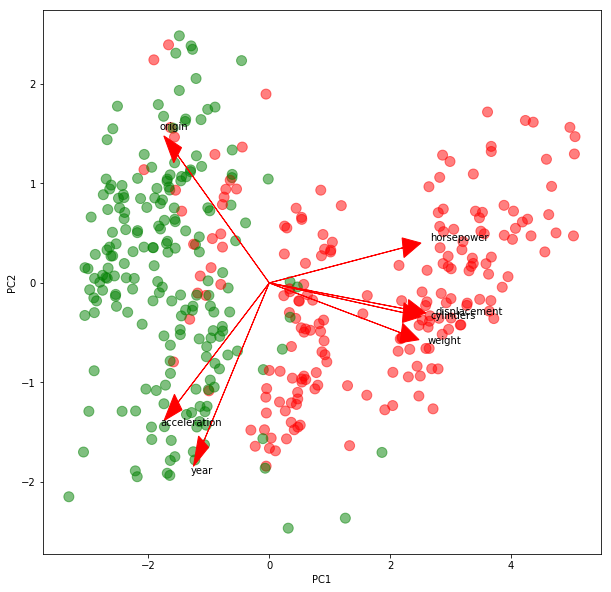

In [10]:
df_scores.plot.scatter(x='PC1',y='PC2',alpha=0.5,s=100,figsize=(10,10),c=target)
x_scale = df_scores['PC1'].abs().max()
y_scale = df_scores['PC2'].abs().max()
for k in range(features.shape[1]):
    x = x_scale*df_loadings.iloc[0,k]
    y = y_scale*df_loadings.iloc[1,k]
    plt.arrow(0,0,x,y,head_width=0.2,color='red')
    x=1.2*x
    y=1.2*y
    plt.text(x,y,features.columns[k],color='black')

### (i)
Horsepower, Displacement, Cylinders, and Weight
### (ii)
Origin, Acceleration, and Year

# (E)

In [11]:
df = pd.read_csv("./Auto-cleaned.csv")
df = df.drop("Unnamed: 0", axis=1)
print(df.shape)
df.head(3)

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [12]:
features = df.drop(['mpg', 'name'], axis=1)
features.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [13]:
features['PWR'] = features.horsepower / features.weight
features.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,PWR
0,8,307.0,130.0,3504,12.0,70,1,0.037100
1,8,350.0,165.0,3693,11.5,70,1,0.044679
2,8,318.0,150.0,3436,11.0,70,1,0.043655
3,8,304.0,150.0,3433,12.0,70,1,0.043694
4,8,302.0,140.0,3449,10.5,70,1,0.040591


In [14]:
features = (features - features.mean()) / features.std()
features.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,PWR
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.715726,0.382008
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.715726,1.659057
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.715726,1.486556
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.715726,1.492984
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.715726,0.970265


PC1    0.602103
PC2    0.187477
PC3    0.097982
PC4    0.063641
PC5    0.029230
PC6    0.014445
PC7    0.004254
PC8    0.000868
dtype: float64


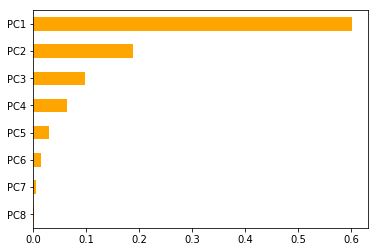

In [15]:
n_comp = features.shape[1]
cols = ['PC'+str(i+1) for i in range(n_comp)]
pca = PCA(n_components=n_comp)
pca.fit(features)
PVE = pd.Series(pca.explained_variance_ratio_, index=cols)
print(PVE)
PVE.sort_values().plot.barh(color='orange')

In [16]:
df_loadings = pd.DataFrame(pca.components_,columns= features.columns, index=cols)
print(df_loadings.shape)
df_loadings.round(2)

(8, 8)


,cylinders,displacement,horsepower,weight,acceleration,year,origin,PWR
PC1,0.42,0.44,0.44,0.41,-0.32,-0.22,-0.27,0.23
PC2,-0.19,-0.17,0.10,-0.28,-0.44,-0.22,0.42,0.66
PC3,-0.05,-0.04,-0.09,-0.04,0.29,-0.94,-0.03,-0.12
PC4,-0.23,-0.15,-0.16,-0.30,-0.23,-0.02,-0.85,0.18
PC5,-0.10,-0.02,0.33,0.03,0.74,0.13,-0.13,0.55
PC6,0.73,0.17,-0.33,-0.53,0.14,0.03,0.02,0.18
PC7,-0.44,0.84,-0.06,-0.29,0.04,0.01,0.06,-0.03
PC8,0.06,-0.12,0.74,-0.55,-0.02,-0.01,-0.01,-0.37


In [17]:
df_scores = pd.DataFrame(pca.transform(features),columns=cols)
print(df_scores.shape)

(392, 8)


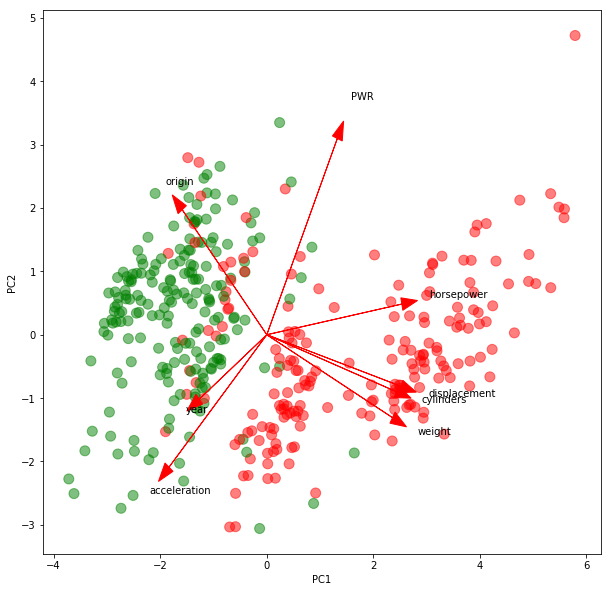

In [18]:
df_scores.plot.scatter(x='PC1',y='PC2',alpha=0.5,s=100,figsize=(10,10),c=target)
x_scale = df_scores['PC1'].abs().max()
y_scale = df_scores['PC2'].abs().max()
for k in range(features.shape[1]):
    x = x_scale*df_loadings.iloc[0,k]
    y = y_scale*df_loadings.iloc[1,k]
    plt.arrow(0,0,x,y,head_width=0.2,color='red')
    x=1.2*x
    y=1.2*y
    plt.text(x,y,features.columns[k],color='black')

### (i)
PWR is correlated with the second principle component
### (ii)
PWR is most similar to acceleration, more power is required to move more weight, so this is directly related to acceleration, as Accleration is equal to F/m, or horsepower/weight, in this case